In [ ]:
import numpy as np
v = np.array([1,1])
v
v.shape

(2,)

In [ ]:
m = np.array([[3,2], [3,2]])
m
m[0,[0]]

array([3])

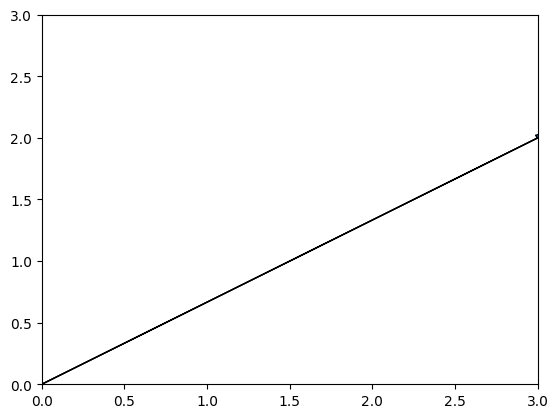

In [ ]:
import matplotlib.pyplot as plt

plt.xlim(0, 3)
plt.ylim(0, 3)

d0=m[0]
d1=m[1]
dx=d0[0]
dy=d0[1]

plt.arrow(0, 0, dx, dy, head_width=0.05, head_length=0.1)

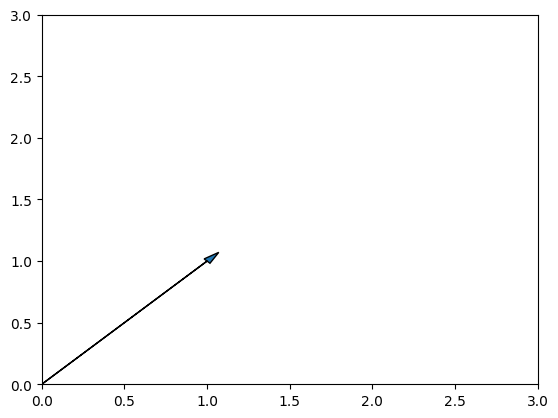

In [ ]:
plt.xlim(0, 3)
plt.ylim(0, 3)

plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1)

L2 norm formula is Euclidean distance (hypotenuse of triangle formed by x length and y length of vector)

$$||x||_{2} = \sqrt{x_{1}^{2} + x_{2}^{2} +\cdots + x_{n}^{2}}$$

For v: 1^2 + 1^2 = 2;
sqrt(2) ~ 1.41

In [ ]:
np.sum(v ** 2)

np.int64(2)

In [ ]:
np.sqrt(np.sum(v ** 2))

np.float64(1.4142135623730951)

In [ ]:
v3 = np.array([0, 1, 2])

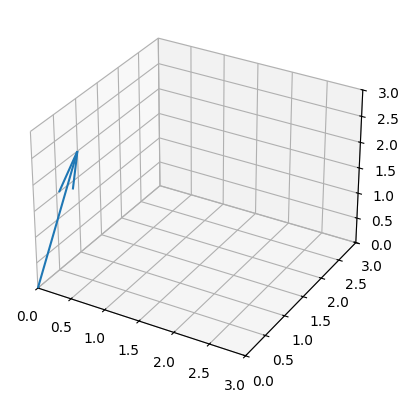

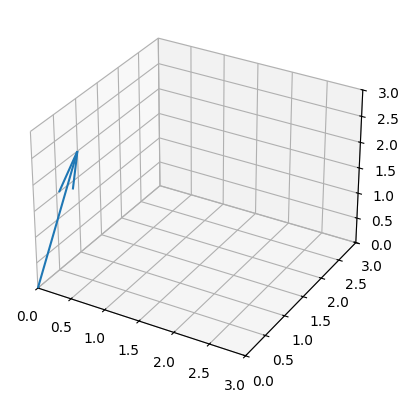

In [ ]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')

ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])

ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], length=1)

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])

ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], length=1)

In [ ]:
v5 = np.array([0, 1, 2, 3, 4])

Scaling vectors

In [ ]:
v_half = np.array([2,1]) * 0.5
v_half

array([1. , 0.5])

Adding vectors

In [ ]:
v_add  = np.array([1,1]) + v_half
v_add

array([2. , 1.5])

Basis vectors

Canonical basis vectors:

0,1

1,0

In [ ]:
v1 = np.array([0,1])
v2 = np.array([1,0])

In [ ]:
# Can use basis vectors to reach any point in 2D space
# 0.3, 1

v1 + v2 * 0.3



array([0.3, 1. ])

In [ ]:
# Basis vectors are orthogonal to each other
# So dot product equals zero

np.dot(v1,v2)

np.int64(0)

You can change basis vectors

Important usage in ML and DL

In [ ]:
M = np.array([[0,1,2], [1,0,2], [3,1,0]])
M

array([[0, 1, 2],
       [1, 0, 2],
       [3, 1, 0]])

Matrix variable is uppercase by convention in programming and math

In [ ]:
M.shape

(3, 3)

Linear regression formula

$\hat{y} = wx + b$

In [ ]:
import pandas as pd

# Read in the data
data = pd.read_csv("/content/clean_weather.csv", index_col=0)
# Fill missing data with past data
# Fill NA/NaN values by propagating the last valid observation to next valid.
data = data.ffill()

data.head(5)


,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


$\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$



---


Matrix multiplication

In [ ]:
X = data[['tmax', 'tmin', 'rain']].iloc[:3].to_numpy()
X

array([[60., 35.,  0.],
       [52., 39.,  0.],
       [52., 35.,  0.]])

In [ ]:
X.shape

(3, 3)

In [ ]:
X_T = X.T
X_T

array([[60., 52., 52.],
       [35., 39., 35.],
       [ 0.,  0.,  0.]])

In [ ]:
w = np.array([0.7, 0.3, 1])
w.shape

(3,)

Reshaping w vector (1D) to W matrix with 3 rows and 1 column.

Reshape requires same # of elements in original array and new array.

In [ ]:
W = w.reshape(3,1)
W

array([[0.7],
       [0.3],
       [1. ]])

Reshaping W matrix to play with transpose.

In [ ]:
W_as_one_row = W.reshape(1,3)
print(W_as_one_row)

[[0.7 0.3 1. ]]


@ is np.matmul shorthand

https://numpy.org/doc/2.1/reference/generated/numpy.matmul.html#numpy.matmul

Playing with transpositions

In [ ]:
w_t = w.T

print(X_T.shape)
print(w_t.shape)
m_t = X_T @ W_as_one_row.T
m_t

(3, 3)
(3,)


array([[109.6],
       [ 71.2],
       [  0. ]])

In [ ]:
m_o = w @ X
m_o.shape

(3,)

In [ ]:
m_new = m_o.reshape(1,3)
m_new

array([[109.6,  71.2,   0. ]])

np.allclose

Returns True if two arrays are element-wise equal within a tolerance.

**KEEP IN MIND THE SHAPE MUST ALIGN (e.g., (1,4) is not the same as (4,1)).
https://numpy.org/doc/2.3/reference/generated/numpy.allclose.html#numpy-allclose

In [ ]:
np.allclose(X_T @ W_as_one_row.T, m_new.T)

True

In [ ]:
X @ W

array([[52.5],
       [48.1],
       [46.9]])

In [ ]:
np.dot(X,W)

array([[52.5],
       [48.1],
       [46.9]])

In [ ]:
np.dot([2j, 2 + 3j], [2j, 3j])

np.complex128(-13+6j)

In [ ]:
np.dot([2,3], [2,3])

np.int64(13)

In [ ]:
np.dot([1j,1j], [1j,1j])

np.complex128(-2+0j)

In [ ]:
b = np.array([10])
# b is bias given for example, not calculated

Y = X @ W + b
Y

array([[62.5],
       [58.1],
       [56.9]])

Slope-intercept formula relation

$y = mx + b$



---

Normal Equation Method

$$W = (X^T X)^{-1} X^T Y$$

---
Identity matrix

np.eye

Return a 2-D array with ones on the diagonal and zeros elsewhere.

https://numpy.org/doc/2.3/reference/generated/numpy.eye.html#numpy.eye

Inverse matrices

np.linalg.inv

DETERMINANT (also called AREA) is the SCALING FACTOR

A matrix has an inverse (is invertible) if and only if its determinant is non-zero.

Cannot invert a singular matrix because determinant is 0.  More simply, determinant is divisor & can't divide by 0. Inverted matrix will be undefined.

In [ ]:
#n = np.linalg.inv(X)
#n

In [ ]:
#norm = np.linalg.inv((X_T @ X)) @ X_T @ Y
#norm

Ridge regression to solve problem of singular matrix.  We add a small 'ridge' to the diagonal.

In [ ]:
id_m = 0.1 * np.eye(3)
id_m

array([[0.1, 0. , 0. ],
       [0. , 0.1, 0. ],
       [0. , 0. , 0.1]])

Test X.shape

index 0 rows


In [ ]:
id_test = 0.1 * np.eye(X.shape[0])
id_test

array([[0.1, 0. , 0. ],
       [0. , 0.1, 0. ],
       [0. , 0. , 0.1]])

In [ ]:
oh = X.shape[0]
oh

3

In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]])

print(a)
print(a.shape[0])
print(a.shape[1])

[[1 2]
 [3 4]
 [5 6]]
3
2


In [ ]:
x_ridge = (X + id_m)
x_ridge

array([[60.1, 35. ,  0. ],
       [52. , 39.1,  0. ],
       [52. , 35. ,  0.1]])

In [ ]:
inv = np.linalg.inv(x_ridge)
inv

array([[ 0.07378611, -0.06604895,  0.        ],
       [-0.09812987,  0.11341549,  0.        ],
       [-4.02332472, -5.34996509, 10.        ]])

Using allclose again to check if matrices are the same aside from rounding off.

In [ ]:
check_close = np.allclose(x_ridge @ inv, np.eye(3))
check_close

True

Using normal equation to calculate weights (W)

$$W = (X^T X)^{-1} X^T Y$$

In [ ]:
Y = data[['tmax_tomorrow']].iloc[:3].to_numpy()
W = np.linalg.inv(X.T @ X + id_m) @ X.T @ Y
# = np.linalg.inv(X.T @ X + 0.1 * np.eye(X.shape[0])) @ X.T @ Y
W

array([[0.38283829],
       [0.86270249],
       [0.        ]])

In [ ]:
Y

array([[52.],
       [52.],
       [53.]])

In [ ]:
X @ W

array([[53.16488447],
       [53.55298814],
       [50.10217817]])

In [ ]:
c = np.ones((5,1))
c

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
d = np.ones((1,1))
d

array([[1.]])

In [ ]:
e = c + d
e

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [ ]:
f = np.array([[2,4,7,8], [6,8,5,2], [10,12,7,6]])
print(f.shape)
print(len(f))

(3, 4)
3


Derivative is slope of tangent line to the curve of the function at a specific point.

---
Finite differences method

$\frac{y^2 - y^1}{x^2 - x^1}$

---
Derivatives important for training neural networks and backpropagation.

Plotting functions and calculating derivatives.

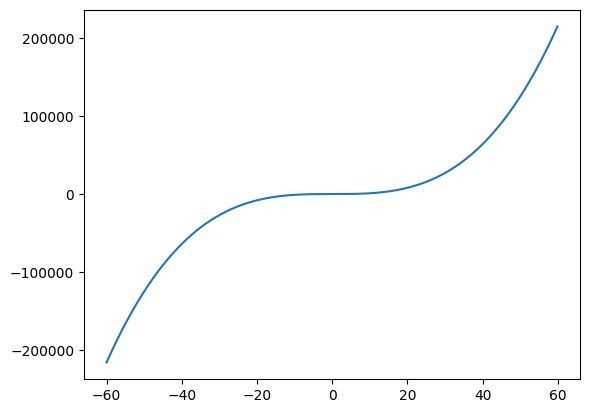

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(-60, 60, 0.1)
fx = x ** 3

plt.plot(x, fx)

In [ ]:
x1 = 40 - 1e-7
x2 = 40 + 1e-7

y1 = x1 ** 3
y2 = x2 ** 3

slope = (y2 - y1)/(x2 - x1)
slope

4800.0000045474735

Checking against my derivitave calculation:

$f(x) = x^3$

$f'(x) = 3x^2$

In [ ]:
x = 40
der = 3 * x ** 2
der

4800